In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
Data_set = np.loadtxt('./data/ThoraricSurgery.csv',delimiter=',')

In [4]:
X = Data_set[:,0:17]
Y = Data_set[:,17]

In [5]:
model = Sequential()
model.add(Dense(30,input_dim=17,activation='relu')) # input_dim 17개 feature값 / 30 -> hidden layer
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X,Y,epochs=100,batch_size=10) # epochs 몇번 돌릴지 / batch_size cpu과부화 막기위해 나눠서 진행
print('\n Accuracy: %.4f'%(model.evaluate(X,Y)[1]))

Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8489
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.8362
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8489
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8426
Epoch 5/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8532
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8468
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8532
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8532
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8426
Epoch 10/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8489
Epoch 11/

# 피마인디언 당뇨병 예측 실습

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('./data/pima-indians-diabetes.csv',names=['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df[['pregnant','class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [19]:
df[['pregnant','class']].groupby(['pregnant'],as_index=False).mean()

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [18]:
df[['pregnant','class']].groupby(['pregnant'],as_index=False).mean().sort_values(by='pregnant',ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


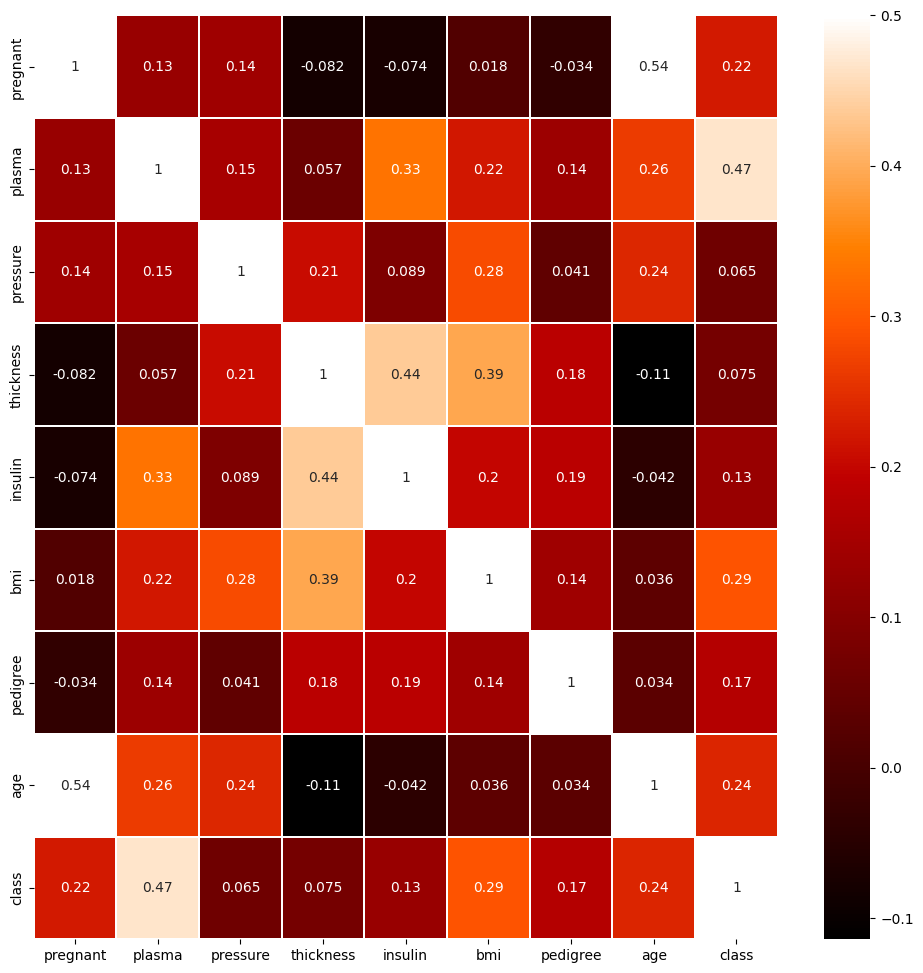

In [22]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=colormap,linecolor='white',annot=True)
plt.show()

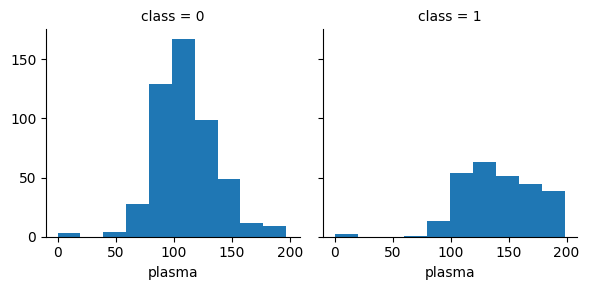

In [23]:
grid = sns.FacetGrid(df,col='class')
grid.map(plt.hist,'plasma',bins=10)
plt.show()

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

dataset = np.loadtxt('./data/pima-indians-diabetes.csv',delimiter=',')

In [27]:
X = dataset[:,0:8].astype(float)
Y = dataset[:,8].astype(float)

In [31]:
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.fit(X,Y,epochs=200,batch_size=10)

Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 6.6257 - accuracy: 0.5026
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 1.2016 - accuracy: 0.5286
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 0.9593 - accuracy: 0.5742
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8804 - accuracy: 0.6003
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8173 - accuracy: 0.6081
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7717 - accuracy: 0.6315
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7764 - accuracy: 0.6224
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7433 - accuracy: 0.6445
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7420 - accuracy: 0.6354
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7074 - accuracy: 0.6393
Epoch 11/

In [35]:
print('\n Accuracy:%.4f'%(model.evaluate(X,Y)[1]))

24/24 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7656

 Accuracy:0.7656


# 아이리스 다중 분류 예측

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [39]:
np.random.seed(3)
tf.random.set_seed(3)

In [40]:
df = pd.read_csv('./data/iris.csv',names=['sepal_length','sepal_width','petal_length','petal_width','species'])

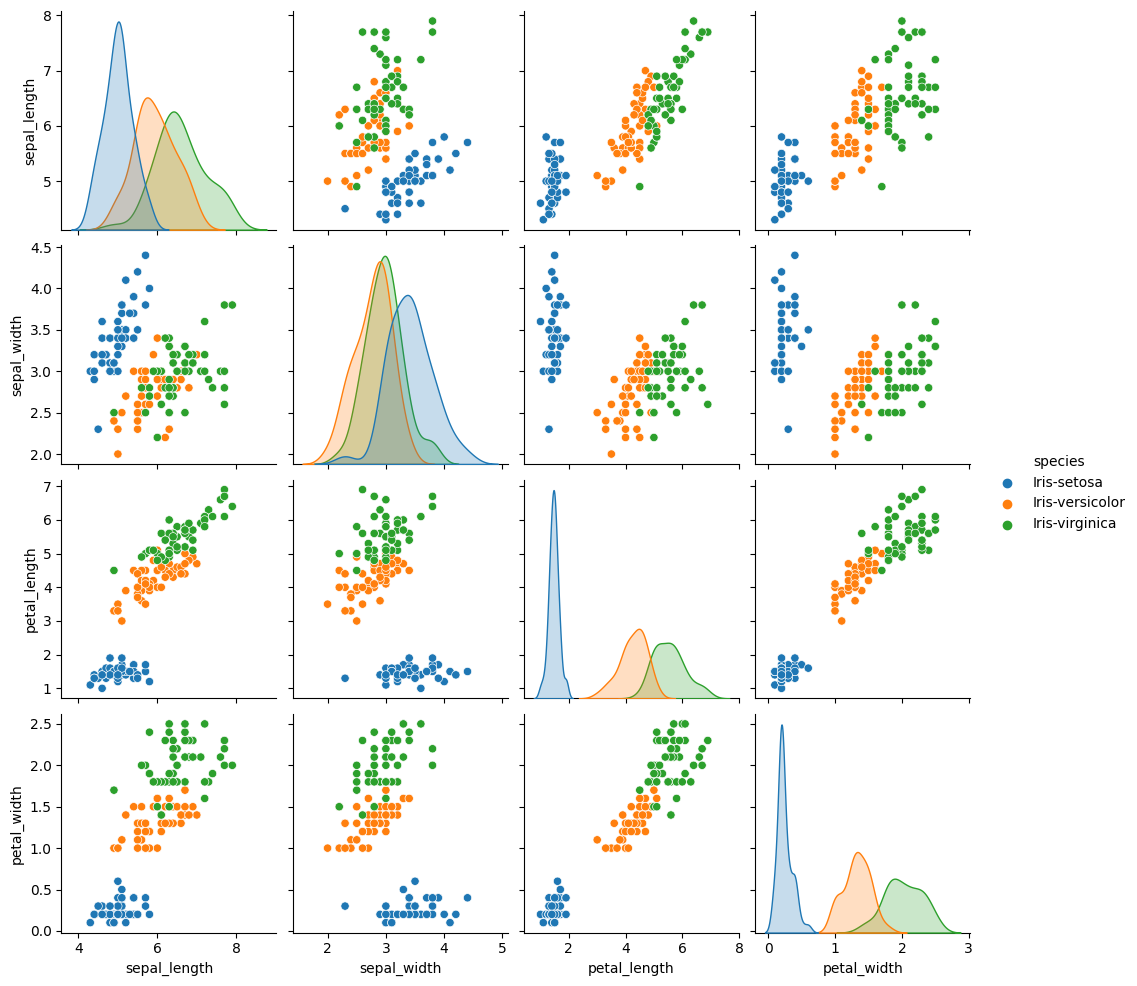

In [41]:
sns.pairplot(df,hue='species')
plt.show()

In [42]:
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

In [43]:
e = LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [44]:
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [46]:
model=Sequential()
model.add(Dense(16,input_dim=4,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
model.fit(X,Y_encoded,epochs=50,batch_size=1)

Epoch 1/50
150/150 [==============================] - 0s 1ms/step - loss: 1.1820 - accuracy: 0.5000
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.9067
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.9067
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.8467
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.9000
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.9467
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.9333
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.9400
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.9667

In [54]:
print('\n Accuracy:%.4f'%(model.evaluate(X,Y_encoded)[1]))

5/5 [==============================] - 0s 1ms/step - loss: 0.0893 - accuracy: 0.9867

 Accuracy:0.9867


실습: 초음파 광물 예측(과적합피하기)

In [59]:
df = pd.read_csv('./data/sonar.csv',header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [70]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

In [63]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [64]:
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

In [68]:
e=LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [69]:
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [117]:
model = Sequential()
model.add(Dense(50, input_dim=60, activation='relu'))
# model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [118]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [119]:
model.fit(X,Y,epochs=200,batch_size=5)

Epoch 1/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5096
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6106
Epoch 3/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6058
Epoch 4/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6061 - accuracy: 0.6875
Epoch 5/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.7308
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7163
Epoch 7/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7596
Epoch 8/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7548
Epoch 9/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7885
Epoch 10/200
42/42 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.7692
Epoch 11/

In [121]:
print('\n Accuracy:%.4f'%(model.evaluate(X,Y)[1]))

7/7 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 1.0000

 Accuracy:1.0000


In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import tensorflow as tf
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
df = pd.read_csv('./data/sonar.csv', header=None)
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=seed)

In [126]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=130, batch_size=5)
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5862
Epoch 2/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6434 - accuracy: 0.6483
Epoch 3/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.6552
Epoch 4/130
29/29 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.6483
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7034
Epoch 6/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5847 - accuracy: 0.7241
Epoch 7/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.7310
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5536 - accuracy: 0.7655
Epoch 9/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.7517
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.7655
Epoch 11/

In [129]:
from keras.models import load_model, save_model

model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=130, batch_size=5)
model.save('my_model.h5')
del model
model = load_model('my_model.h5')
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.4966
Epoch 2/130
29/29 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6552
Epoch 4/130
29/29 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.7862
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.8138
Epoch 6/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.8207
Epoch 7/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5335 - accuracy: 0.8069
Epoch 8/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.8069
Epoch 9/130
29/29 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.8000
Epoch 10/130
29/29 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.8138
Epoch 11/

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import numpy
import pandas as pd
import tensorflow as tf
# seed 값 설정
seed = 0
numpy.random.seed(0)
tf.random.set_seed(3)
df = pd.read_csv('./data/sonar.csv', header=None)
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [3]:
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy=[]
for train, test in skf.split(X,Y):
    model = Sequential()
    model.add(Dense(24,  input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = '%.4f' %(model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)
print('\n %.f fold accuracy:'%n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.4920
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.6043
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6631
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.7540
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7807
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7754
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7807
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.8182
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8128
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8235
Epoch 11/